In [58]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load

In [ ]:
rslc = np.fromfile('sim_data/S1-FH-FS-Train/ifg_fr/0slc2.rslc', dtype='>c8')
rslc.reshape((-1, 2))

In [ ]:
coh = np.fromfile('sim_data/S1-FH-FS-Train/ifg_fr/0slc1_0slc2.filt.coh', dtype='>c8')
coh.reshape((-1, 2))

In [ ]:
coh = np.fromfile('sim_data/S1-FH-FS-Train/ifg_fr/0slc2.rslc.bar.norm', dtype='>c8')
coh.reshape((-1, 2))

In [ ]:
flit = np.fromfile('sim_data/S1-FH-FS-Train/ifg_fr/0slc1_0slc2.filt', dtype='>c8')
flit = flit.reshape((512, 512))

In [ ]:
np.angle(flit[0,0])

In [ ]:
flit

In [ ]:
png = np.fromfile('sim_data/S1-FH-FS-Train/ifg_fr/0slc1_0slc2.filt.png')

In [ ]:
png

In [ ]:
png.shape

In [ ]:
png.reshape

In [ ]:
png = cv2.imread('sim_data/S1-FH-FS-Train/ifg_fr/0slc1_0slc2.filt.png')

In [ ]:
png.shape

In [ ]:
png

# Calculate Wrap Count

k = (unwrap phase - wrap phase)/2pi

In [ ]:
from skimage.restoration import unwrap_phase

In [59]:
# ranged = np.load('sim_data/S1-Flow-FS-Train/ifg_fr/0slc1_0slc2.filt_range.npy')
# azimuth = np.load('sim_data/S1-Flow-FS-Train/ifg_fr/0slc1_0slc2.filt_azimuth.npy')
wrapped = np.load('sim_data/S1-Flow-FS-Train/ifg_fr/0slc1_0slc2.filt.npy')
unwrapped = np.load('sim_data/S1-Flow-FS-Train/ifg_fr/0slc1_0slc2.filt_unwrapped.npy')
# unwrapped = unwrap_phase(wrapped)
# k_scikit = np.round((unwrapped_scikit - wrapped)/(2*np.pi))
k = np.round((unwrapped - wrapped)/(2*np.pi))

In [ ]:
plt.imshow(unwrapped, cmap='jet')

In [ ]:
plt.imshow(k, cmap='jet')

In [ ]:
plt.imshow(wrapped + 2*np.pi*k, cmap='jet')

In [60]:
def gradient(mat):
    # https://www.mdpi.com/2072-4292/15/21/5081
    
    azimuth_gradient = np.zeros_like(mat)
    range_gradient = np.zeros_like(mat)

    n = len(mat)

    for i in range(n):
        if i == 0:
            azimuth_gradient[i,:] = mat[i+1,:] - mat[i,:] # first row/column
            range_gradient[:,i] = mat[:,i+1] - mat[:,i] # first row/column
        elif i == n-1:
            azimuth_gradient[i,:] = mat[i,:] - mat[i-1,:] # last row/column
            range_gradient[:,i] = mat[:,i] - mat[:,i-1] # last row/column
        else:
            azimuth_gradient[i,:] = (mat[i+1,:] - mat[i-1,:])/2 # other elements
            range_gradient[:,i] = (mat[:,i+1] - mat[:,i-1])/2 # other elements


    return range_gradient, azimuth_gradient

In [ ]:
def gradient(mat):
    # https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9614199

    azimuth_gradient = np.zeros_like(mat)
    range_gradient = np.zeros_like(mat)

    n = len(mat)

    for i in range(n):
        if i == n-1:
            azimuth_gradient[i,:] = mat[i,:] - mat[i-1,:] # last row/column
            range_gradient[:,i] = mat[:,i] - mat[:,i-1] # last row/column
        else:
            azimuth_gradient[i,:] = (mat[i+1,:] - mat[i,:]) # other elements
            range_gradient[:,i] = (mat[:,i+1] - mat[:,i]) # other elements


    return range_gradient, azimuth_gradient

In [61]:
np.max(k)

2.0

In [62]:
np.min(k)

-3.0

In [63]:
ranged, azimuth = gradient(k)

In [64]:
ranged

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
np.nonzero(ranged)[1].shape

(4544,)

In [66]:
np.where(ranged > 0)[0].shape

(3644,)

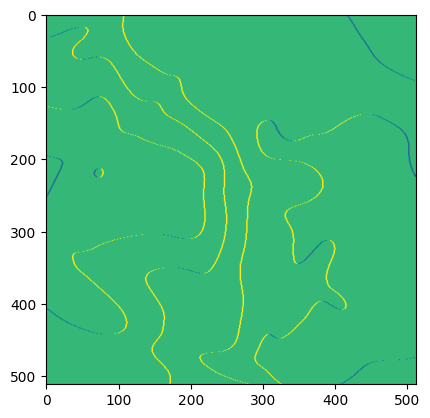

In [67]:
plt.imshow(ranged,)

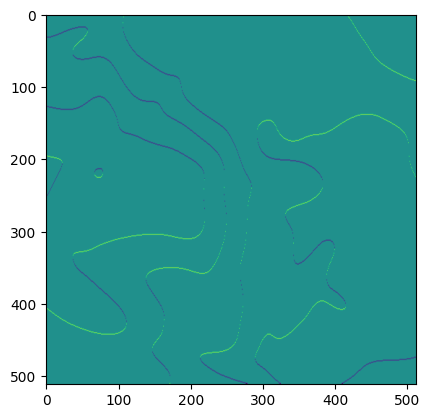

In [68]:
plt.imshow(azimuth,)

In [69]:
ranged[0].shape

(512,)

In [70]:
delta = np.concatenate((ranged.flatten(), azimuth.flatten()))

In [71]:
delta.shape

(524288,)

In [73]:
n = 128
A = torch.zeros((2*n**2, n**2), dtype=int)

In [74]:
A.to_sparse()

tensor(indices=tensor([], size=(2, 0)),
       values=tensor([], size=(0,)),
       size=(32768, 16384), nnz=0, layout=torch.sparse_coo)

In [ ]:
torch.zeros()

In [ ]:
A.shape

# Reconstruction